# Assignment #1

STUDENT ID: 27868

In [ ]:
%matplotlib inline 
import os, sys
import json
import networkx as nx
import random
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np



## Erdos-Renyi network simulation

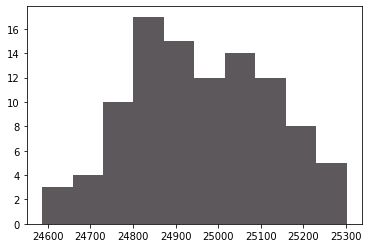

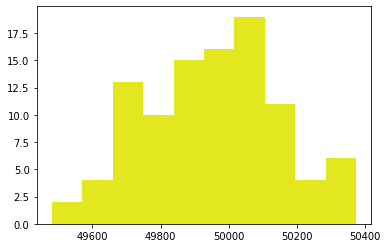

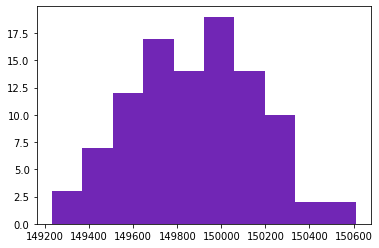

In [ ]:
def simulate_erdos_renyi(N, p):
    graph = nx.Graph()
    for i in range(N):
      graph.add_node(i)
    for u, v in combinations(graph, 2):
      isEdge = random.choices(["no","yes"],weights=(1-p,p),k=1)
      if isEdge==["yes"]:
        graph.add_edge(u, v)
    return graph

probs = [0.05,0.1,0.3]
for prob in probs:
  numEdges = []
  for i in range(100):
    G = simulate_erdos_renyi(1000,prob)
    numEdges.append(G.number_of_edges())
  plt.hist(numEdges, color = np.random.rand(3,))
  plt.show()

# As expected, all distributions look like "normal distribution" since our generator is Erdos-Renyi.

# Network generation and node properties

### Network analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

DATA_PATH = '/content/drive/MyDrive/CS48002-NetworkScience/'

Mounted at /content/drive


# **1. Contiguous USA Network**
  Nodes : States
  
  Edges: Borders between states

In [ ]:
# Load network
with open(DATA_PATH+'borders.txt', 'r') as f:
  myList = f.readlines()
edgeList = []
for i in range(2,len(myList)):
  edgeList.append(tuple(map(int,myList[i].strip().split())))

G = nx.Graph()
G.add_edges_from(edgeList)

In [ ]:
nx.info(G)

'Graph with 49 nodes and 107 edges'

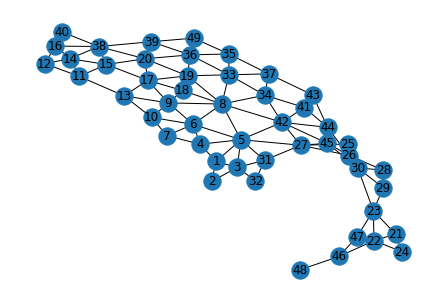

In [ ]:
#Let's see how our network looks !
nx.draw(G, with_labels = True )

In [ ]:
# Given above image, we expect is_connected to return true. Let's check it.
nx.is_connected(G)

True

In [ ]:
# Since the graph is connected, largest connected component of G is itself !
# So, I expect the below method return all 49 nodes.
largest_cc = max(nx.connected_components(G), key=len)
print(len(largest_cc))

49


In [ ]:
# Let's check the radius
nx.radius(G)

6

In [ ]:
# It turns out that our graph is not dense much.
nx.density(G)

0.09098639455782313

In [ ]:
# Finding top 3 popular nodes (based on number of their neighbors)
nx.voterank(G,3)

[5, 8, 30]

In [ ]:
nx.degree_assortativity_coefficient(G)

0.23339651250947788

In [ ]:
# Average connectivities for degrees k from 1 to 8. (I.e.the average nearest neighbor degree of nodes with degree k)
nx.average_degree_connectivity(G)

{1: 3.0,
 2: 4.7,
 3: 4.296296296296297,
 4: 4.9375,
 5: 4.666666666666667,
 6: 5.166666666666667,
 7: 5.857142857142857,
 8: 5.75}

In [ ]:
#Let's check if there are any cliques in the graph.
nx.graph_number_of_cliques(G)

60

In [ ]:
# Apparently, there are 60 cliques in our network. I wonder how big the largest clique is!
nx.graph_clique_number(G)

3

In [ ]:
# Node attributes can be found in USA_Network.gexf file.
nx.write_gexf(G, '{}/USA_Network.gexf'.format(DATA_PATH))

# **2. Harry Potter Characters Support Network**
Nodes: Characters of Harry Potter

Edge (u,v): Node u gives support to node v


In [ ]:
namesList = dict()
with open(DATA_PATH+'hpnames.txt', 'r') as f:
  lines = f.readlines()
  for line in lines:
    pair = list(map(str, line.strip().split("\t")))
    if pair[0] =="\"id\"":
      pass
    else:
      namesList[int(pair[0])-1] = pair[1]


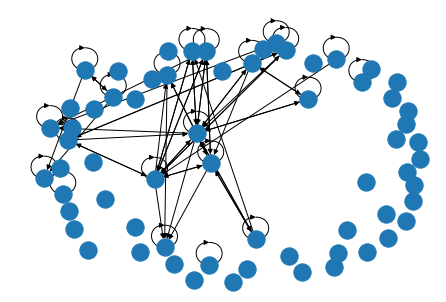

In [ ]:
myList = []
with open(DATA_PATH+'hpbook6.txt', 'r') as f:
  lines = f.readlines()
  for line in lines:
    myList.append(list(map(int,line.strip().split(" "))))

mat = np.array(myList)
HP = nx.from_numpy_array(mat, create_using = nx.DiGraph)
HP = nx.relabel_nodes(HP,namesList)
pos = nx.spring_layout(HP, k = 0.7, iterations = 20)
nx.draw(HP,pos, arrows = True)


In [ ]:
nx.info(HP)

'DiGraph with 64 nodes and 4096 edges'

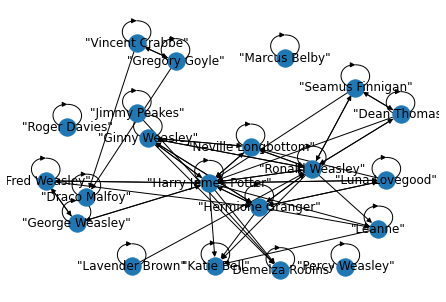

In [ ]:
# It seems that our network is very sparse. There are many characters who do not receive or give any support.
# For a better analysis, let's remove them from the network.
remove = []
for node in HP.nodes():
  if len(HP.in_edges(node)) + len(HP.out_edges(node)) == 0:
    remove.append(node)
HP.remove_nodes_from(remove)
pos = nx.spring_layout(HP, k = 0.7, iterations = 20)
nx.draw(HP,pos, with_labels = True, arrows = True)

In [ ]:
nx.info(HP)

'DiGraph with 21 nodes and 74 edges'

In [ ]:
#Let's compute some graph properties first:
print("Density:", nx.density(HP))
# Our graph is actually not this dense, however, since we removed nodes without edges, density of the current one is higher.

Density: 0.1761904761904762


In [ ]:
# We cannot find a finite radius since the graph is not connected !
# So, I won't run nx.radius(HP)

In [ ]:
# Finding top 3 popular nodes (based on number of their neighbors)
nx.voterank(HP,3)

['"Harry James Potter"', '"Ronald Weasley"', '"Gregory Goyle"']

In [ ]:
nx.is_strongly_connected(HP)

False

In [ ]:
#Largest strongly connected component of our support network is as follows:
largest = max(nx.strongly_connected_components(HP), key=len)
largest


{'"Dean Thomas"',
 '"Fred Weasley"',
 '"George Weasley"',
 '"Ginny Weasley"',
 '"Harry James Potter"',
 '"Hermione Granger"',
 '"Luna Lovegood"',
 '"Neville Longbottom"',
 '"Ronald Weasley"',
 '"Seamus Finnigan"'}

In [ ]:
nx.is_weakly_connected(HP)

False

In [ ]:
largest_wcc = max(nx.weakly_connected_components(HP), key=len)
largest_wcc

{'"Dean Thomas"',
 '"Demelza Robins"',
 '"Fred Weasley"',
 '"George Weasley"',
 '"Ginny Weasley"',
 '"Harry James Potter"',
 '"Hermione Granger"',
 '"Jimmy Peakes"',
 '"Katie Bell"',
 '"Lavender Brown"',
 '"Leanne"',
 '"Luna Lovegood"',
 '"Neville Longbottom"',
 '"Ronald Weasley"',
 '"Seamus Finnigan"'}

In [ ]:
# Degree distribution of HP
nx.in_degree_centrality(HP)

{'"Dean Thomas"': 0.15000000000000002,
 '"Demelza Robins"': 0.2,
 '"Draco Malfoy"': 0.15000000000000002,
 '"Fred Weasley"': 0.15000000000000002,
 '"George Weasley"': 0.15000000000000002,
 '"Ginny Weasley"': 0.25,
 '"Gregory Goyle"': 0.1,
 '"Harry James Potter"': 0.5,
 '"Hermione Granger"': 0.30000000000000004,
 '"Jimmy Peakes"': 0.05,
 '"Katie Bell"': 0.25,
 '"Lavender Brown"': 0.05,
 '"Leanne"': 0.2,
 '"Luna Lovegood"': 0.15000000000000002,
 '"Marcus Belby"': 0.05,
 '"Neville Longbottom"': 0.25,
 '"Percy Weasley"': 0.05,
 '"Roger Davies"': 0.05,
 '"Ronald Weasley"': 0.4,
 '"Seamus Finnigan"': 0.15000000000000002,
 '"Vincent Crabbe"': 0.1}

In [ ]:
# More node attributes can be found in HarryPotter_Support_Network.gexf file.
nx.write_gexf(HP, '{}/HarryPotter_Support_Network.gexf'.format(DATA_PATH))

# **3. Zebras Network**

Nodes: Zebras

Edges: Undirected social relationship between zebras

In [ ]:
#Load the network
with open(DATA_PATH+'zebra.txt', 'r') as f:
  myList = f.readlines()
edgeList = []
for i in range(2,len(myList)):
  edgeList.append(tuple(map(int,myList[i].strip().split())))

Z = nx.Graph()
Z.add_edges_from(edgeList)

In [ ]:
nx.info(Z)

'Graph with 27 nodes and 111 edges'

In [ ]:
# It is not too sparse.
nx.density(Z)

0.3162393162393162

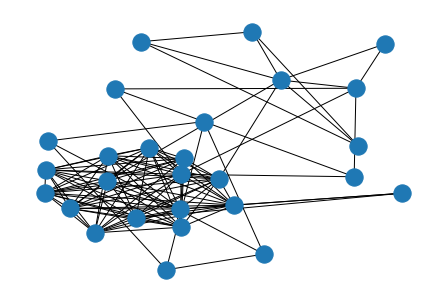

In [ ]:
pos = nx.spring_layout(Z, k = 0.7, iterations = 20)
nx.draw(Z,pos)

In [ ]:
nx.is_connected(Z)

False

In [ ]:
# Uppss! Our network is not connected. We cannot calculate the radius :(
# Let's see how many connected components it has
nx.number_connected_components(Z)

2

In [ ]:
# Let's check largest connected component's size.
largest = max(nx.connected_components(Z), key=len)
len(largest)

23

In [ ]:
nx.has_bridges(Z)

False

In [ ]:
# We do not expect to see any isolated ones.
nx.number_of_isolates(Z)

0

In [ ]:
nx.degree_assortativity_coefficient(Z)

0.7177029474921698

In [ ]:
nx.degree_centrality(Z)

{1: 0.5,
 2: 0.5,
 3: 0.5,
 4: 0.5,
 5: 0.11538461538461539,
 6: 0.46153846153846156,
 7: 0.46153846153846156,
 8: 0.5,
 9: 0.5,
 10: 0.5,
 11: 0.5,
 12: 0.5,
 13: 0.5384615384615385,
 14: 0.42307692307692313,
 15: 0.46153846153846156,
 16: 0.2692307692307693,
 17: 0.19230769230769232,
 18: 0.07692307692307693,
 19: 0.11538461538461539,
 20: 0.11538461538461539,
 21: 0.11538461538461539,
 22: 0.11538461538461539,
 23: 0.11538461538461539,
 24: 0.11538461538461539,
 25: 0.11538461538461539,
 26: 0.11538461538461539,
 27: 0.11538461538461539}

In [ ]:
nx.betweenness_centrality(Z)

{1: 0.024030781184627346,
 2: 0.0031333452871914413,
 3: 0.0031333452871914413,
 4: 0.017254079254079256,
 5: 0.0,
 6: 0.0015886677425138967,
 7: 0.002876935030781184,
 8: 0.024030781184627346,
 9: 0.0031333452871914413,
 10: 0.10144073874843107,
 11: 0.0031333452871914413,
 12: 0.0031333452871914413,
 13: 0.13557790927021696,
 14: 0.08036489151873767,
 15: 0.0028769350307811846,
 16: 0.21290693921463152,
 17: 0.052153846153846155,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0}

In [ ]:
# More node attributes can be found in Zebra_Network.gexf file.
nx.write_gexf(Z, '{}/Zebra_Network.gexf'.format(DATA_PATH))

# Cayley tree

**Computing number of nodes for k = 5 and d = 8**

 If the longest path is 8, there are 5 layers in this tree (including the root).Number of nodes at each layer -starting from the root - is as follows:

1  -   5  -  20  -  80 - 320

Then, number of nodes is equal to 426.

In [ ]:
"""Given number of edges of the root and the longest path in a Cayley tree, the function returns number of nodes in the tree."""
def findNodeCount(k,d):
  if d == 0:
    return 1
  count = 1+k
  for i in range(d//2-1):
    count += k * ((k-1)**(i+1))
  return count

In [ ]:
findNodeCount(5,8)

426

In [ ]:
!pip install pydot

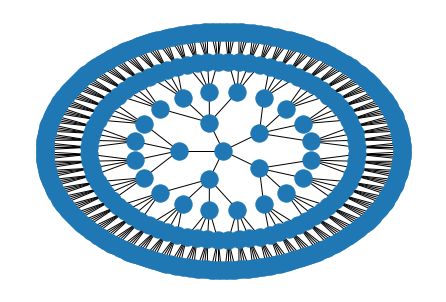

In [ ]:
import pydot
from queue import Queue
from networkx.drawing.nx_pydot import graphviz_layout

T = nx.Graph()
frontier = Queue()
current = 0
T.add_node(current)
frontier.put(current)

while True:
  if current == 425:
    break
  parent = frontier.get()
  if parent == 0:
    for i in range(5):
      current+=1
      T.add_edge(parent,current)
      frontier.put(current)
  else:
    for i in range(4):
      current+=1
      T.add_edge(parent,current)
      frontier.put(current)
      if current == 425:
        break
pos = graphviz_layout(T, prog="twopi")
nx.draw(T, pos)
plt.fig
plt.show()